In [1]:
#Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Load Dataset
carslm = pd.read_csv('./carslm.csv')
carslm.head()

id  speed  dist
0   1      4     2
1   2      4    10
2   3      7     4
3   4      7    22
4   5      8    16

In [3]:
dfnew =carslm.drop('id',axis=1)
dfnew.head()

speed  dist
0      4     2
1      4    10
2      7     4
3      7    22
4      8    16

In [4]:
#Show Key Statistics
dfnew.describe()

speed        dist
count  50.000000   50.000000
mean   15.400000   42.980000
std     5.287644   25.769377
min     4.000000    2.000000
25%    12.000000   26.000000
50%    15.000000   36.000000
75%    19.000000   56.000000
max    25.000000  120.000000

In [5]:
# Overview of Dataset Characteristics
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
speed    50 non-null int64
dist     50 non-null int64
dtypes: int64(2)
memory usage: 880.0 bytes


In [6]:
#Summary of N/A Values
dfnew.isnull().sum()

speed    0
dist     0
dtype: int64

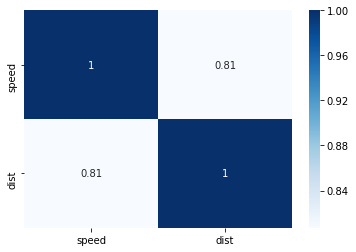

In [7]:
#Visualization of Correlations
import seaborn as sns
sns.heatmap(dfnew.corr(),annot=True,cmap="Blues")

In [8]:
#Define x and y variable
x=dfnew['speed'].values
y=dfnew['dist'].values

In [9]:
#Load Library for Training Dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [10]:
#Script for Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

#Converting variables to 2D
x_train2 = x_train.reshape(-1,1)
x_test2 = x_test.reshape(-1,1)

#Create Model
for name,method in [('Linear regression', LinearRegression())]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)

print('Method: %s' %name) 

#Coefficents
print('Intercept: %.2f'% method.intercept_)
print('Coefficient: %.2f'% method.coef_)
    
#MAE,MSE and RMSE

print('R2: %.2f'% r2_score(y_test, predict) )
print('Mean Absolute Error: %.2f'% metrics.mean_absolute_error(y_test, predict))  
print('Mean Squared Error: %.2f'% metrics.mean_squared_error(y_test, predict))  
print('Root Mean Squared Error: %.2f'% np.sqrt(metrics.mean_squared_error(y_test, predict))) 

Method: Linear regression
Intercept: -15.64
Coefficient: 3.81
R2: 0.79
Mean Absolute Error: 8.80
Mean Squared Error: 121.11
Root Mean Squared Error: 11.01


In [11]:
#Gridsearch

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor

#Linear Model
lm2=LinearRegression()
param_grid = {'fit_intercept':[True,False],'normalize':[True,False], 'copy_X':[True, False]}
lm2_model = GridSearchCV(lm2, param_grid, cv=10, verbose=0,scoring = 'neg_mean_squared_error',n_jobs=-1)

#SGD Model
sgd = SGDRegressor(max_iter=1000,random_state=100)
param_gridsgd = {'loss': ["squared_loss","huber", "epsilon_insensitive", "squared_epsilon_insensitive"],
          'penalty':["none", "l2", "l1", "elasticnet"],
          'alpha':[0.001, 0.0001, 0.00001]}
sgd_model = GridSearchCV(sgd, param_gridsgd,cv=10, verbose=0,scoring = 'neg_mean_squared_error',n_jobs=-1)

grids = [lm2_model,sgd_model] 
grid_dict = {0:'LinearReg', 1:'SGD'}

#Model Creation
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Optimized Models') 

#Fit the grid search objects 
for idx, optmodel in enumerate(grids): 
     print('\nEstimator: %s' % grid_dict[idx])
     #Fit grid search
     optmodel.fit(x_train2, y_train) 
     #Best params 
     print('Best params: %s' % optmodel.best_params_)
     # Predict on test data with best params 
     y_pred3 = optmodel.predict(x_test2) 
     # Test data accuracy of model with best params    
     print('R2: %.2f'% r2_score(y_test, y_pred3))
     print('Intercept: %.2f'% optmodel.best_estimator_.intercept_)
     print('Coefficient: %.2f'% optmodel.best_estimator_.coef_)   
     print('Mean Absolute Error: %0.2f' % metrics.mean_absolute_error(y_test, y_pred3))  
     print('Mean Squared Error: %0.2f'% metrics.mean_squared_error(y_test, y_pred3))  
     print('Root Mean Squared Error: %0.2f'% np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))  

Optimized Models

Estimator: LinearReg
Best params: {'copy_X': True, 'fit_intercept': True, 'normalize': True}
R2: 0.79
Intercept: -15.64
Coefficient: 3.81
Mean Absolute Error: 8.80
Mean Squared Error: 121.11
Root Mean Squared Error: 11.01

Estimator: SGD
Best params: {'alpha': 0.001, 'loss': 'squared_loss', 'penalty': 'l2'}
R2: 0.72
Intercept: -16.24
Coefficient: 3.52
Mean Absolute Error: 9.95
Mean Squared Error: 161.85
Root Mean Squared Error: 12.72
